In [ ]:
# prompt: import necessary libraries for machine learning and deep learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

## EDA on DeepWeeds Dataset


In [ ]:
ds, info = tfds.load('deep_weeds', split='train', shuffle_files=True, with_info=True)


In [ ]:
import os
import PIL
import PIL.Image
import pathlib


Number of samples: 17509
Number of classes: 9
Class distribution:
  Chinee apple: 1125
  Lantana: 1064
  Parkinsonia: 1031
  Parthenium: 1022
  Prickly acacia: 1062
  Rubber vine: 1009
  Siam weed: 1074
  Snake weed: 1016
  Negative: 9106


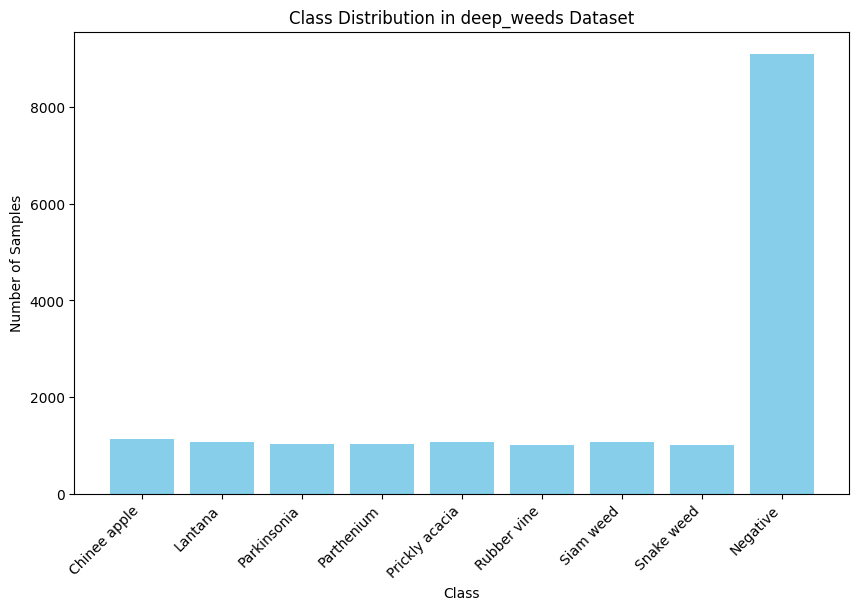


Image Information:
  Image Shapes: {(256, 256, 3)}
  Mean Pixel Values: 96.76518500179166


In [ ]:
# Get the number of samples and classes
num_samples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

# Get class names
class_names = info.features['label'].names

# Class distribution and sample images
class_distribution = {class_name: 0 for class_name in class_names}
sample_images = {class_name: None for class_name in class_names}

# Additional information about images
image_shapes = []
mean_pixel_values = []

for example in ds:
    label = example['label'].numpy()
    class_name = class_names[label]

    # Update class distribution
    class_distribution[class_name] += 1

    # Get image information
    image = example['image'].numpy()
    image_shapes.append(image.shape)
    mean_pixel_values.append(np.mean(image))

    # Store one sample image from each class
    if sample_images[class_name] is None:
        sample_images[class_name] = image

# Display statistics
print(f"Number of samples: {num_samples}")
print(f"Number of classes: {num_classes}")
print(f"Class distribution:")
for class_name, count in class_distribution.items():
    print(f"  {class_name}: {count}")

# Display histogram of class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in deep_weeds Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display additional information about images
print(f"\nImage Information:")
print(f"  Image Shapes: {set(image_shapes)}")  # Display unique image shapes
print(f"  Mean Pixel Values: {np.mean(mean_pixel_values)}")




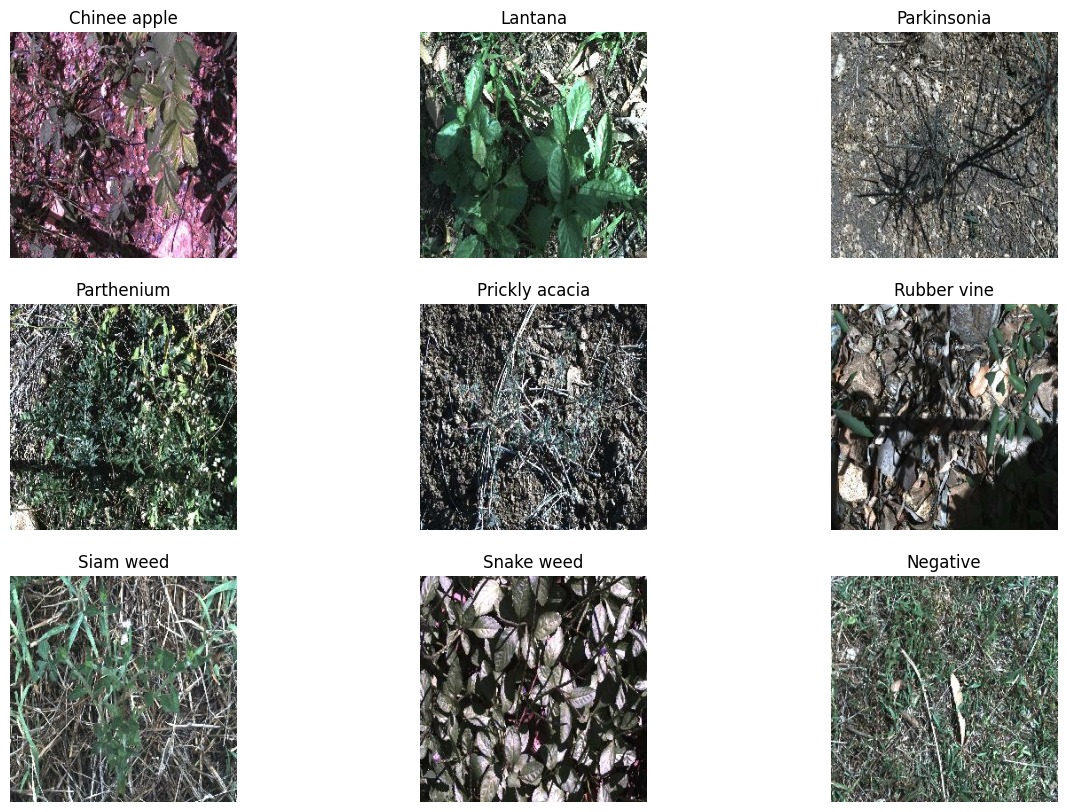

In [ ]:
# Display one sample image from each class in a 3-row layout
fig, axes = plt.subplots(3, num_classes // 3, figsize=(15, 10))
for i, class_name in enumerate(class_names):
    row = i // 3
    col = i % (num_classes // 3)
    axes[row, col].imshow(sample_images[class_name])
    axes[row, col].set_title(class_name)
    axes[row, col].axis('off')
plt.show()

In [ ]:
from PIL import Image
import os

def read_tiff_images(root_folder):
    for label in os.listdir(root_folder):
        label_path = os.path.join(root_folder, label)

        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                if image_file.lower().endswith('.tiff') or image_file.lower().endswith('.tif'):
                    image_path = os.path.join(label_path, image_file)

                    # Read the TIFF image using Pillow
                    image = Image.open(image_path)


                    print(f"Label: {label}, Image: {image_file}, Size: {image.size}")

                    image.close()

dataset_folder = '/content/drive/MyDrive/dataset'
read_tiff_images(dataset_folder)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Label: soil, Image: 2233.tif, Size: (202, 265)
Label: soil, Image: 2166.tif, Size: (222, 257)
Label: soil, Image: 2108.tif, Size: (224, 230)
Label: soil, Image: 2176.tif, Size: (292, 267)
Label: soil, Image: 215.tif, Size: (208, 238)
Label: soil, Image: 2093.tif, Size: (280, 279)
Label: soil, Image: 2269.tif, Size: (226, 251)
Label: soil, Image: 2263.tif, Size: (211, 228)
Label: soil, Image: 2182.tif, Size: (246, 239)
Label: soil, Image: 2283.tif, Size: (247, 251)
Label: soil, Image: 2170.tif, Size: (241, 237)
Label: soil, Image: 2175.tif, Size: (240, 232)
Label: soil, Image: 2186.tif, Size: (276, 261)
Label: soil, Image: 2222.tif, Size: (275, 275)
Label: soil, Image: 2083.tif, Size: (232, 219)
Label: soil, Image: 2231.tif, Size: (259, 258)
Label: soil, Image: 2135.tif, Size: (280, 199)
Label: soil, Image: 2279.tif, Size: (260, 224)
Label: soil, Image: 212.tif, Size: (243, 243)
Label: soil, Image: 2148.tif, Size: (230, 220)
Label: soil, Im

Number of samples: 15340
Number of classes: 4
Class distribution:
  soybean: 7376
  soil: 3253
  grass: 3520
  broadleaf: 1191


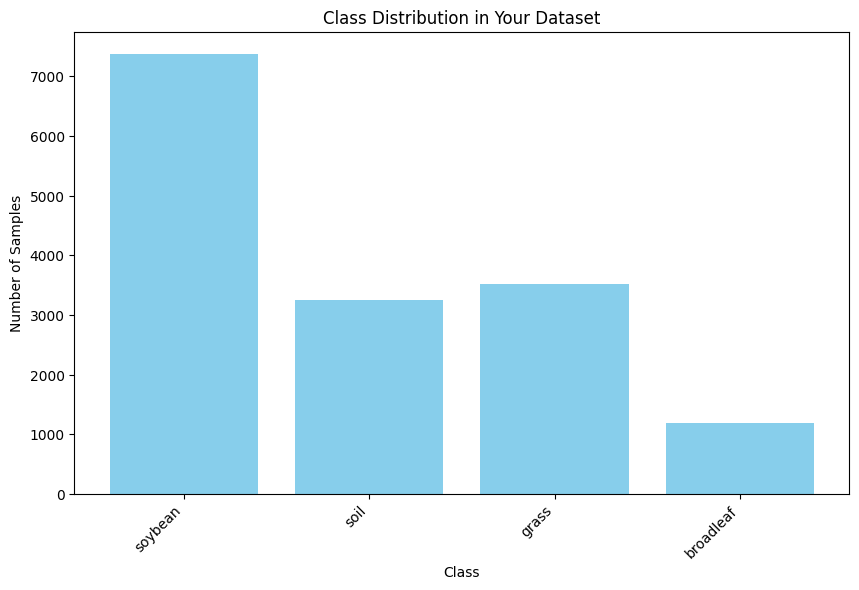


Image Information:
  Image Shapes: {(297, 214, 3), (285, 292, 3), (228, 282, 3), (245, 312, 3), (232, 224, 3), (249, 254, 3), (229, 295, 3), (260, 226, 3), (281, 198, 3), (241, 218, 3), (228, 233, 3), (245, 263, 3), (219, 318, 3), (229, 246, 3), (281, 277, 3), (237, 227, 3), (231, 241, 3), (215, 224, 3), (225, 255, 3), (249, 284, 3), (232, 254, 3), (229, 325, 3), (219, 269, 3), (260, 256, 3), (276, 223, 3), (224, 218, 3), (176, 232, 3), (231, 192, 3), (228, 263, 3), (229, 276, 3), (280, 244, 3), (297, 274, 3), (180, 253, 3), (228, 214, 3), (191, 225, 3), (215, 254, 3), (208, 255, 3), (260, 286, 3), (219, 299, 3), (268, 273, 3), (231, 222, 3), (248, 314, 3), (211, 263, 3), (207, 193, 3), (260, 237, 3), (272, 293, 3), (264, 282, 3), (280, 274, 3), (369, 228, 3), (211, 214, 3), (208, 285, 3), (271, 231, 3), (251, 272, 3), (329, 248, 3), (260, 188, 3), (263, 195, 3), (190, 193, 3), (214, 222, 3), (207, 223, 3), (268, 303, 3), (243, 237, 3), (260, 267, 3), (219, 280, 3), (259, 204, 3), (21

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

dataset_folder = '/content/drive/MyDrive/dataset'

# Function to read TIFF images
def read_tiff_image(file_path):
    image = Image.open(file_path)
    return np.array(image)

# Get the number of samples and classes
num_samples = 0
num_classes = 0
class_names = set()

# Class distribution and sample images
class_distribution = {}
sample_images = {}

# Additional information about images
image_shapes = []
mean_pixel_values = []

for label in os.listdir(dataset_folder):
    label_path = os.path.join(dataset_folder, label)

    if os.path.isdir(label_path):
        class_names.add(label)
        class_distribution[label] = 0
        sample_images[label] = None

        for image_file in os.listdir(label_path):
            if image_file.lower().endswith('.tiff') or image_file.lower().endswith('.tif'):
                image_path = os.path.join(label_path, image_file)

                # Read the TIFF image
                image = read_tiff_image(image_path)

                # Update class distribution
                class_distribution[label] += 1

                # Get image information
                image_shapes.append(image.shape)
                mean_pixel_values.append(np.mean(image))

                # Store one sample image from each class
                if sample_images[label] is None:
                    sample_images[label] = image

                num_samples += 1

# Display statistics
print(f"Number of samples: {num_samples}")
print(f"Number of classes: {len(class_names)}")
print(f"Class distribution:")
for class_name, count in class_distribution.items():
    print(f"  {class_name}: {count}")

# Display histogram of class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Your Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display additional information about images
print(f"\nImage Information:")
print(f"  Image Shapes: {set(image_shapes)}")  # Display unique image shapes
print(f"  Mean Pixel Values: {np.mean(mean_pixel_values)}")


[########################################] | 100% Completed | 4.33 s


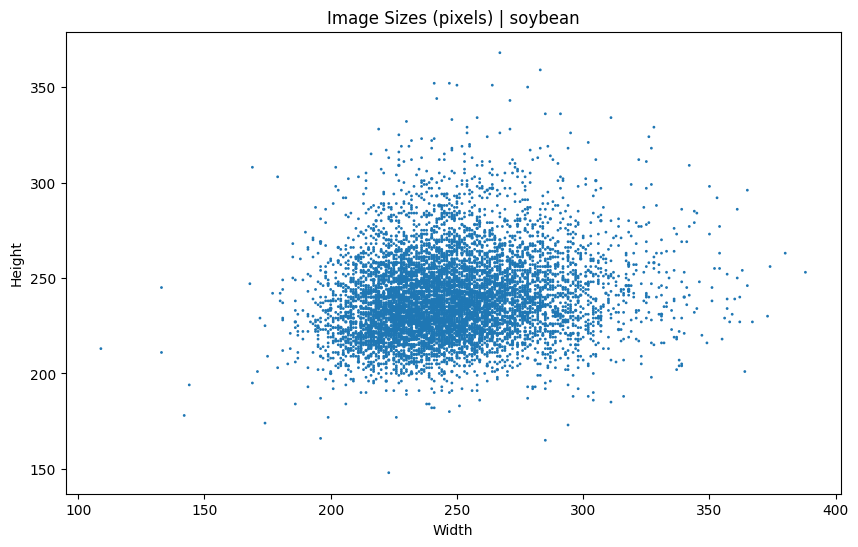

[########################################] | 100% Completed | 2.60 s


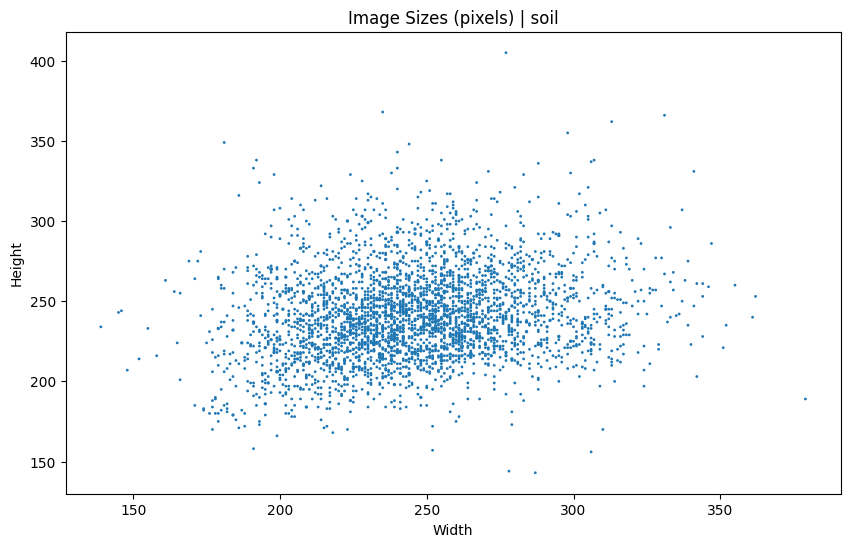

[########################################] | 100% Completed | 2.59 s


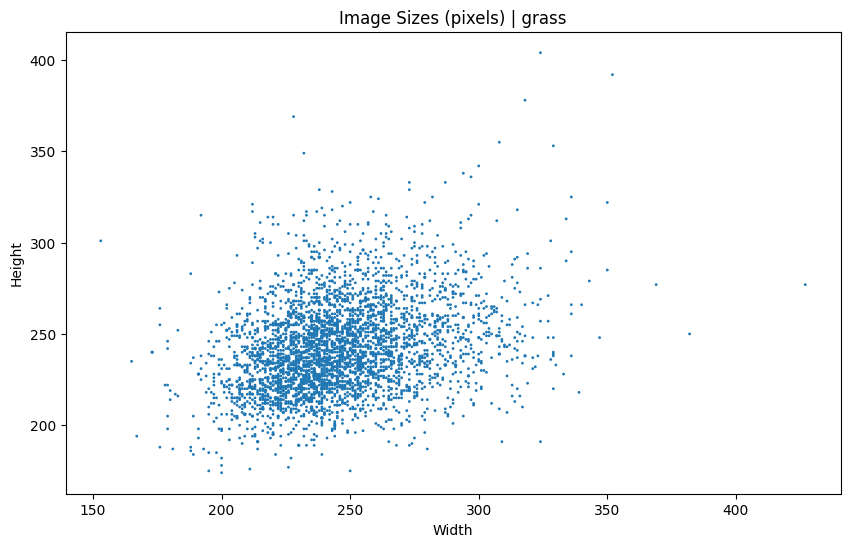

[########################################] | 100% Completed | 1.67 s


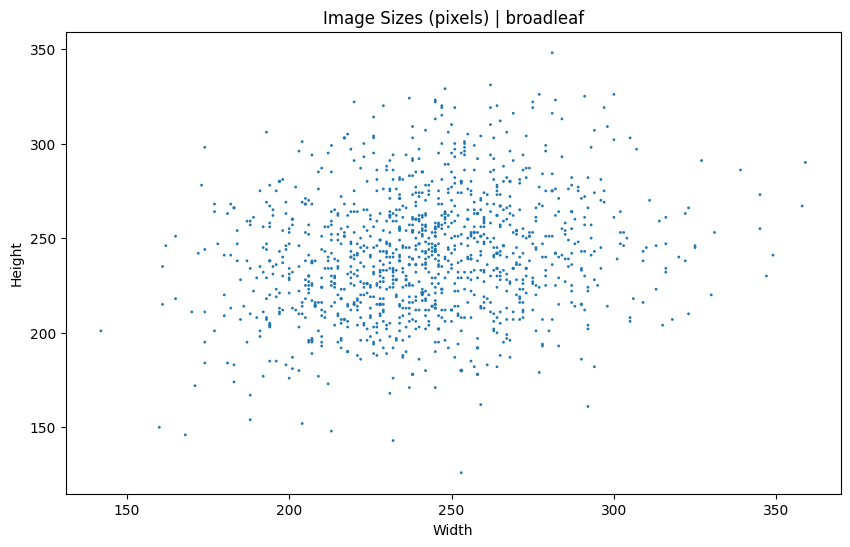

In [ ]:

import dask.bag as db
import dask.diagnostics as diagnostics

dataset_folder = '/content/drive/MyDrive/dataset'

# Function to read TIFF images
def read_tiff_image(file_path):
    image = Image.open(file_path)
    return np.array(image)

def get_dims(image_path):
    try:
        image = Image.open(image_path)
        width, height = image.size
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        width, height = -1, -1  # Handle error by assigning invalid dimensions

    return {'height': height, 'width': width, 'path': image_path}

# Get class names
class_names = [d for d in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, d))]

for class_name in class_names:
    class_path = os.path.join(dataset_folder, class_name)

    # Get a list of image paths for the current class
    image_paths = [os.path.join(class_path, file) for file in os.listdir(class_path) if file.lower().endswith('.tiff') or file.lower().endswith('.tif')]

    # Create a Dask bag with the image paths
    image_bag = db.from_sequence(image_paths)

    # Read image dimensions using Dask
    dims = image_bag.map(get_dims)

    # Compute the dimensions
    with diagnostics.ProgressBar():
        dims = dims.compute()

    # Create a DataFrame with the dimensions
    dim_df = pd.DataFrame(dims)

    # Group by height and width, and count the occurrences
    sizes = dim_df.groupby(['height', 'width']).size().reset_index(name='count')

    # Create a scatter plot for each class
    plt.figure(figsize=(10, 6))
    plt.scatter(x=sizes['width'], y=sizes['height'], s=sizes['count'])
    plt.title(f'Image Sizes (pixels) | {class_name}')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()


In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf

dataset_folder = '/content/drive/MyDrive/dataset'
image_size = (256, 256)  # Specify the desired image size

# Function to read TIFF images and their labels
def read_tiff_image_with_label(label, file_path):
    image = Image.open(file_path).resize(image_size)
    image_array = np.array(image)
    return image_array, label

# Lists to store image data and labels
image_data = []
labels = []

# Additional information about images
image_shapes = []
mean_pixel_values = []

for label in os.listdir(dataset_folder):
    label_path = os.path.join(dataset_folder, label)

    if os.path.isdir(label_path):
        for image_file in os.listdir(label_path):
            if image_file.lower().endswith('.tiff') or image_file.lower().endswith('.tif'):
                image_path = os.path.join(label_path, image_file)

                # Read the TIFF image and get its label
                image, label = read_tiff_image_with_label(label, image_path)

                # Update lists
                image_data.append(image)
                labels.append(label)

                # Get image information
                image_shapes.append(image.shape)
                mean_pixel_values.append(np.mean(image))





# Create a generator function
def generator():
    for image, label in zip(image_data, labels):
        yield {'image': image, 'label': label}

# Create a TensorFlow dataset
tf_dataset = tf.data.Dataset.from_generator(generator, output_signature={'image': tf.TensorSpec(shape=(256, 256, 3), dtype=tf.uint8), 'label': tf.TensorSpec(shape=(), dtype=tf.string)})

# Convert integer labels to string class names for the 'ds' dataset
def convert_labels_to_string(example):
    label_index = example['label']
    class_name = tf.py_function(lambda x: index_to_name_mapping[x.numpy()], [label_index], tf.string)
    example['label'] = class_name
    return example

# Convert integer labels to string class names for the 'ds' dataset
ds_string_labels = ds.map(convert_labels_to_string)

# Now, let's concatenate the datasets
concatenated_dataset = tf.data.Dataset.concatenate(ds_string_labels, tf_dataset)

# Print the first batch for verification
for batch in concatenated_dataset.take(1):
    print(batch)


{'image': <tf.Tensor: shape=(256, 256, 3), dtype=uint8, numpy=
array([[[ 26,  31,  25],
        [ 31,  36,  30],
        [ 26,  33,  26],
        ...,
        [ 45,  54,  53],
        [108, 112, 113],
        [ 97, 101, 102]],

       [[ 22,  27,  21],
        [ 38,  43,  37],
        [ 12,  19,  12],
        ...,
        [ 66,  72,  72],
        [141, 145, 146],
        [112, 116, 117]],

       [[  7,  12,   6],
        [ 34,  39,  33],
        [  8,  15,   8],
        ...,
        [ 48,  52,  53],
        [ 47,  48,  50],
        [ 77,  78,  80]],

       ...,

       [[158, 133, 128],
        [149, 126, 120],
        [143, 124, 117],
        ...,
        [155, 157, 170],
        [134, 136, 148],
        [ 38,  40,  52]],

       [[107,  92,  85],
        [133, 120, 112],
        [150, 141, 132],
        ...,
        [170, 169, 183],
        [155, 155, 167],
        [ 27,  27,  37]],

       [[ 61,  51,  42],
        [ 76,  67,  58],
        [147, 143, 132],
        ...,
        [17

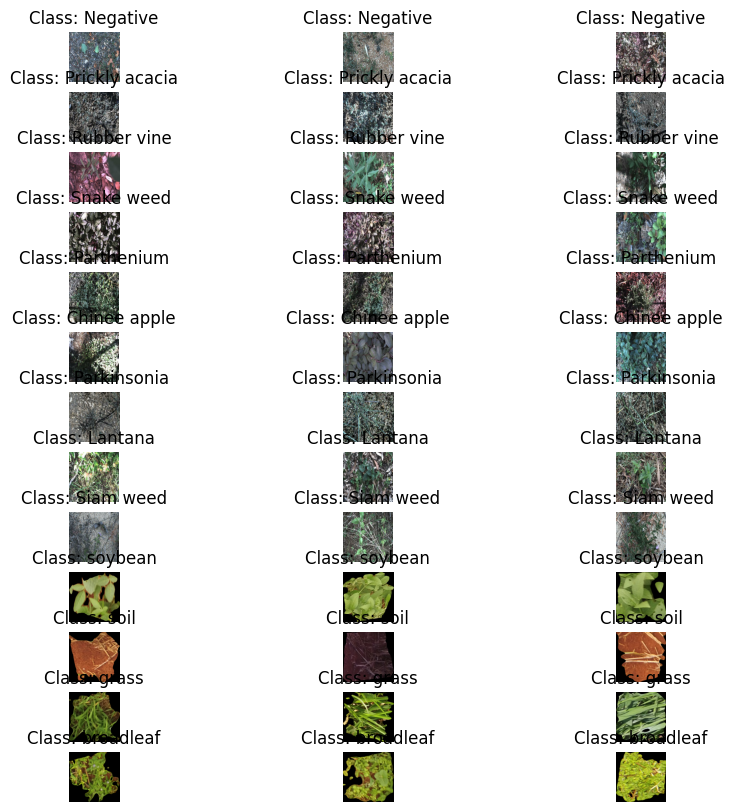

In [ ]:

# 1. Separate the Dataset by Class
classes = concatenated_dataset.map(lambda x: x['label']).unique()

# 2. Select Samples from Each Class
samples_per_class = 3
selected_samples = []

for class_label in classes:
    class_samples = concatenated_dataset.filter(lambda x: tf.math.equal(x['label'], class_label)).take(samples_per_class)
    selected_samples.extend(class_samples)

# 3. Plot the Samples
fig, axes = plt.subplots(len(selected_samples) // samples_per_class, samples_per_class, figsize=(10, 10))

for i, sample in enumerate(selected_samples):
    image = sample['image'].numpy()
    label = sample['label'].numpy().decode('utf-8')

    if len(selected_samples) // samples_per_class > 1:
        ax = axes[i // samples_per_class, i % samples_per_class]
    else:
        ax = axes[i % samples_per_class]

    ax.imshow(image)
    ax.set_title(f'Class: {label}')
    ax.axis('off')

plt.show()


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
# Convert labels to integer indices
unique_labels = np.unique(labels)
label_to_index_mapping = {label: i for i, label in enumerate(unique_labels)}
index_to_name_mapping = {i: label for i, label in enumerate(unique_labels)}
labels = [label_to_index_mapping[label] for label in labels]

# Convert lists to NumPy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Normalize pixel values to the range [0, 1]
image_data = image_data.astype('float32') / 255.0

# Create a TensorFlow dataset
tf_dataset = tf.data.Dataset.from_tensor_slices({'image': image_data, 'label': labels})

# Shuffle and batch the dataset
tf_dataset = tf_dataset.shuffle(buffer_size=len(tf_dataset)).batch(batch_size=32)

# Create a ResNet50 model
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(256, 256, 3), include_top=False)

# Freeze the pre-trained layers
for layer in resnet_model.layers:
    layer.trainable = False

# Create a new model using the ResNet50 base and add custom layers
model = tf.keras.Sequential([
    resnet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(unique_labels), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the prepared dataset
model.fit(tf_dataset, epochs=10)

94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/10


ValueError: ignored